In [3]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['41d11a50ce17475b8912c7e1aca58e93.f-id.14cd3a896ff14f56981aead2b5c1b98a']
ds = experiment.get_intermediate_dataset(
    node_id='72e4ed62-b697-48e5-9130-8c177809b70d-6843',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
df = ds.to_dataframe()

In [4]:
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,dayOfWeek,days,predicted
0,4,0,11,13,0,0,1,-0.192091,-0.607642,-0.211691,314,Sun,304,194.434029
1,1,0,3,5,0,1,1,-1.542385,0.066198,0.764304,2,Tue,55,-14.181950
2,1,0,12,5,0,0,1,-1.542385,0.636370,-0.699689,1,Sun,353,-49.813833
3,1,1,1,2,0,1,1,-1.023041,-1.074146,0.276306,2,Tue,390,112.828909
4,4,0,10,19,0,1,2,0.638860,1.051040,-0.211691,205,Thr,281,229.288630


In [9]:
%matplotlib inline

def ts_bikes(df, times):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    for tm in times:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'cnt', ax = ax)          
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'predicted', color = 'red', ax = ax)                                    
        plt.xlabel("Days from start")
        plt.ylabel("Number of bikes rented")
        plt.title("Bikes rented for hour = " + str(tm))
        fig.savefig('ts_' + str(tm) + '.png')
    return 'Done'

def resids(df):
    df['resids'] = df.predicted - df.cnt
    return df        
        
def box_resids(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    
    df = resids(df)
    
    fig = plt.figure(figsize=(12, 6))
    fig.clf()
    ax = fig.gca()  
    df.boxplot(column = ['resids'], by = ['hr'], ax = ax)   
    plt.xlabel('')
    plt.ylabel('Residuals')
    fig.savefig('boxes' + '.png')
    return 'Done'
    
 
def ts_resids_hist(df, times):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    for tm in times:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        ax.hist(df.ix[df.hr == tm, 'resids'].as_matrix(), bins = 30)
        plt.xlabel("Residuals")
        plt.ylabel("Density")
        plt.title("Histograms of residuals for hour = " + str(tm))
        fig.savefig('hist_' + str(tm) + '.png')
       
    return 'Done'

## cnt vs. predicted (Linear Regression model)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


'Done'

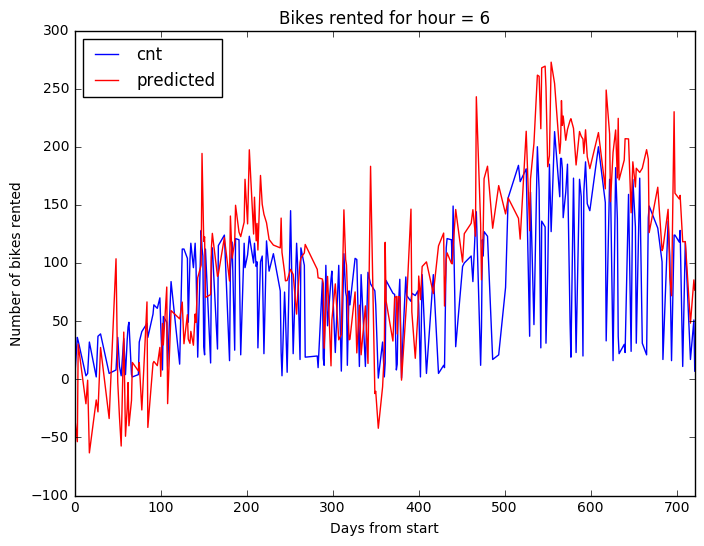

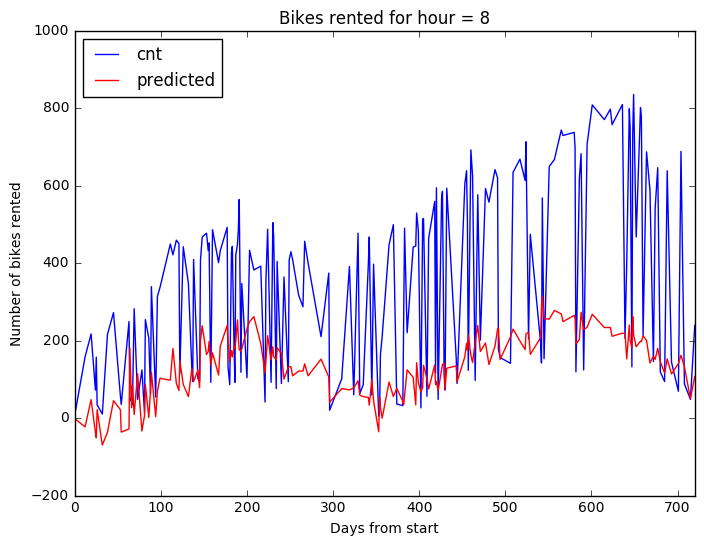

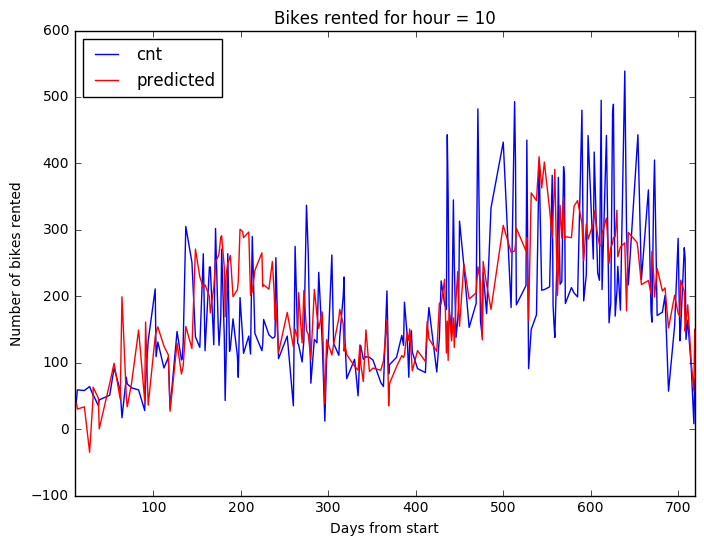

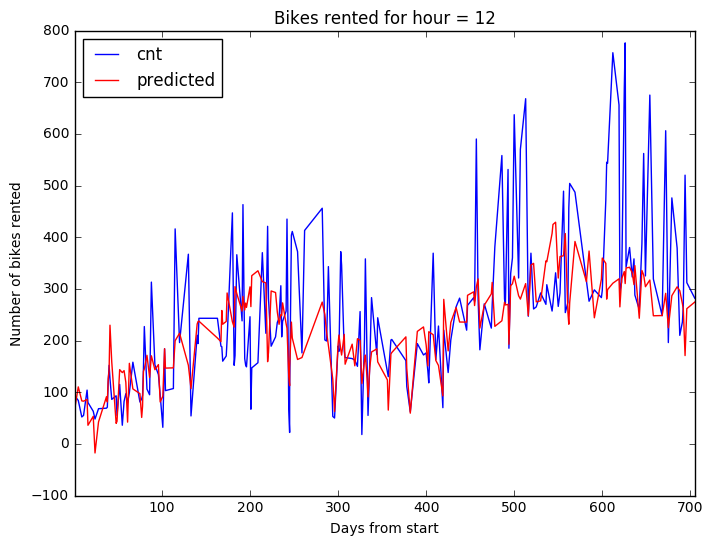

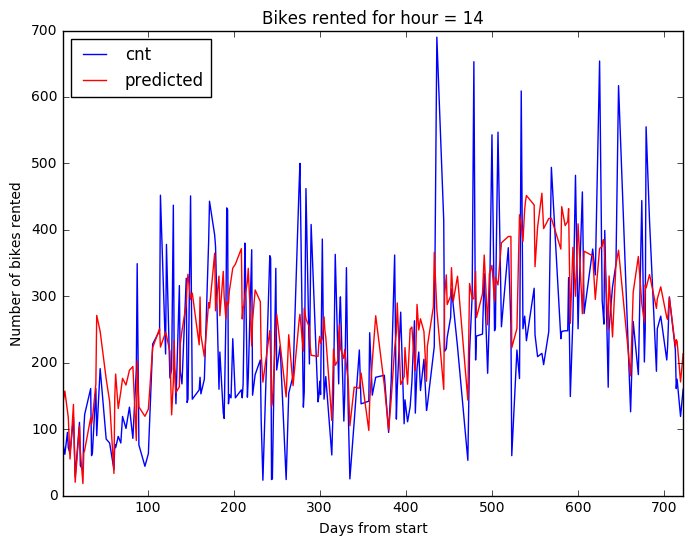

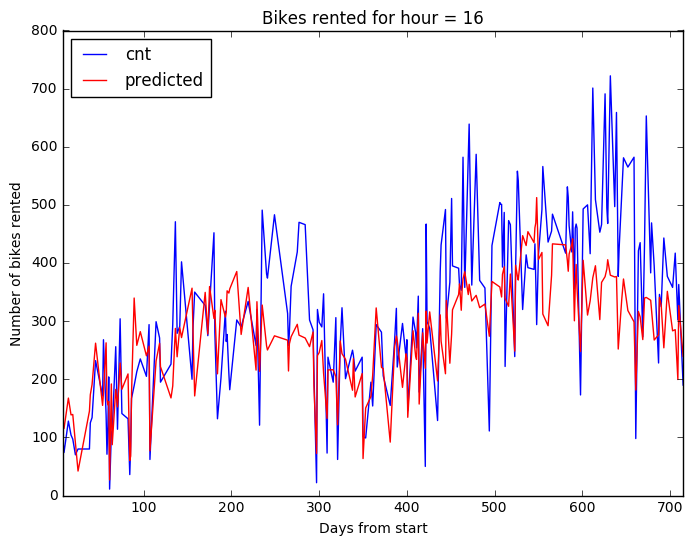

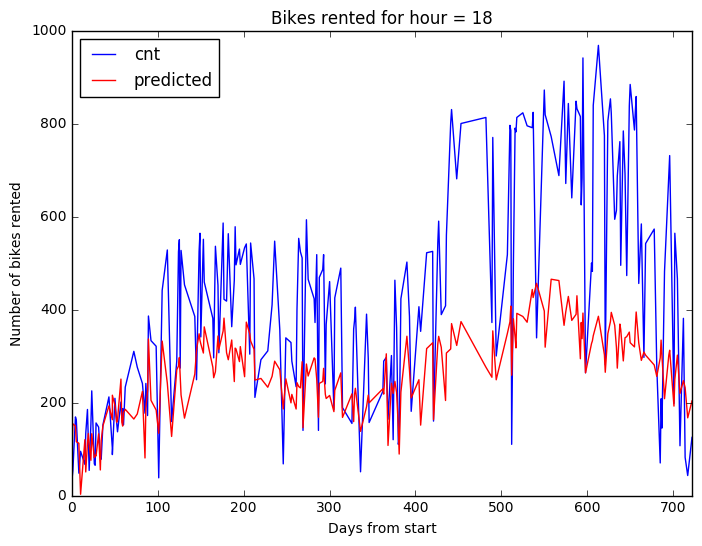

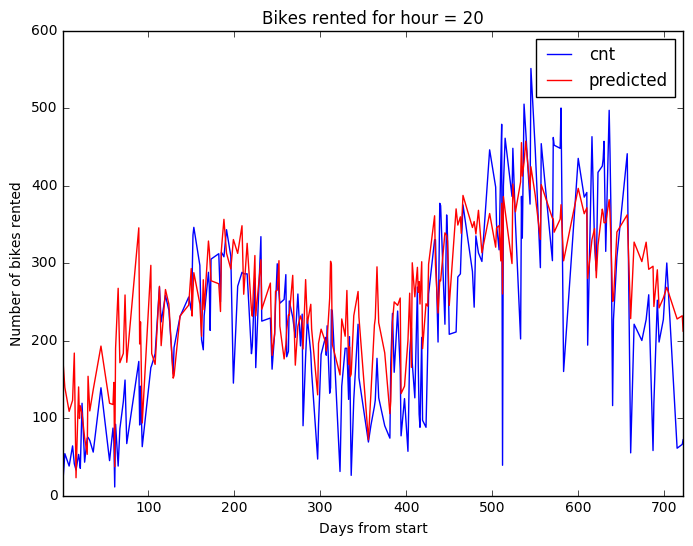

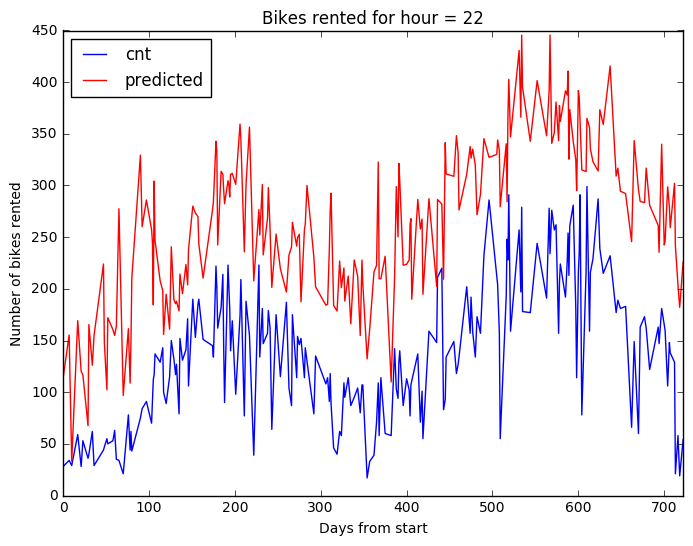

In [10]:
df = df.sort(['days', 'hr'], axis = 0, ascending = True)
times = [6, 8, 10, 12, 14, 16, 18, 20, 22]

ts_bikes(df, times)

#### cnt vs predicted conclusion: 
The model consistently underestimates the number of bike rentals at 8am

## Box plot for Residuals

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


'Done'

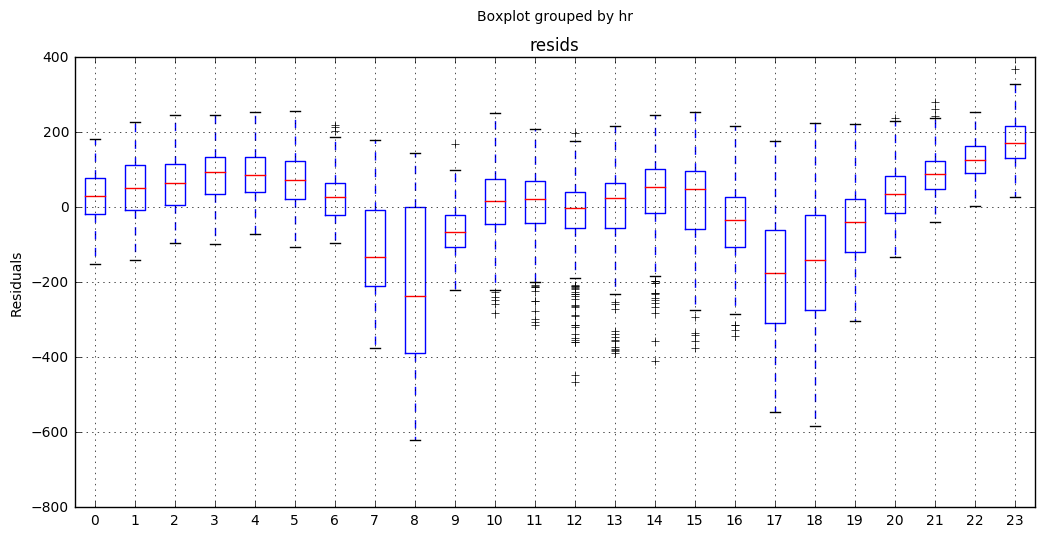

In [11]:
box_resids(df)

#### Box plot conclusion: There are high negative residuals for the peak periods of bike rental in the day (around 8am and 6pm), confirming that the model is significantly under-predicting for these times.

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


'Done'

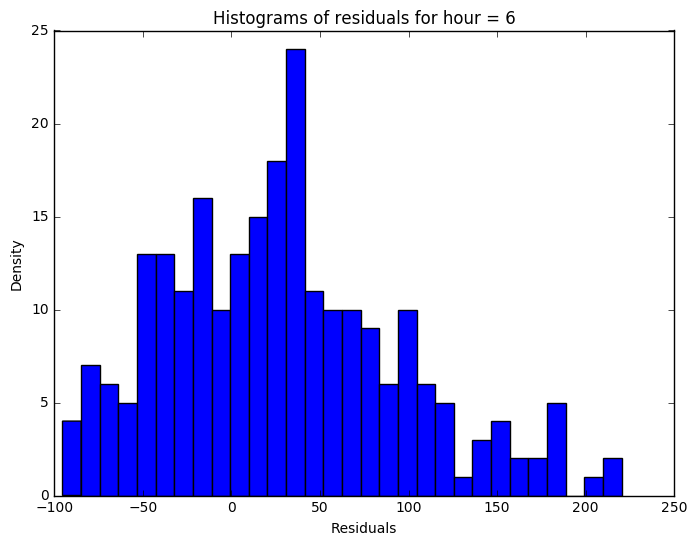

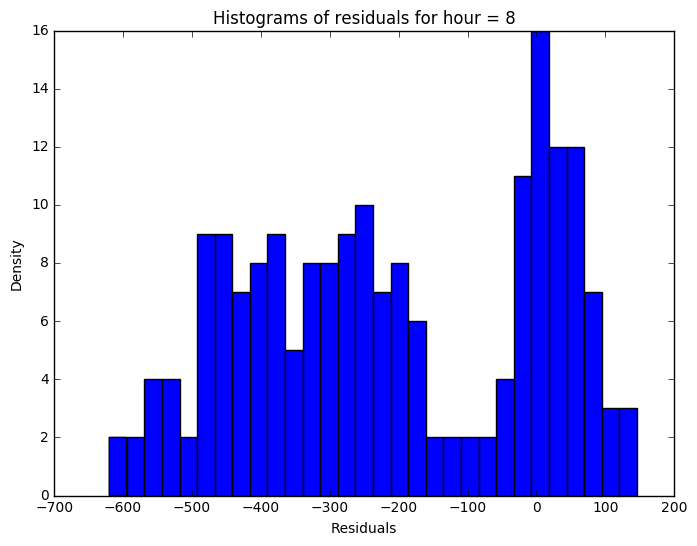

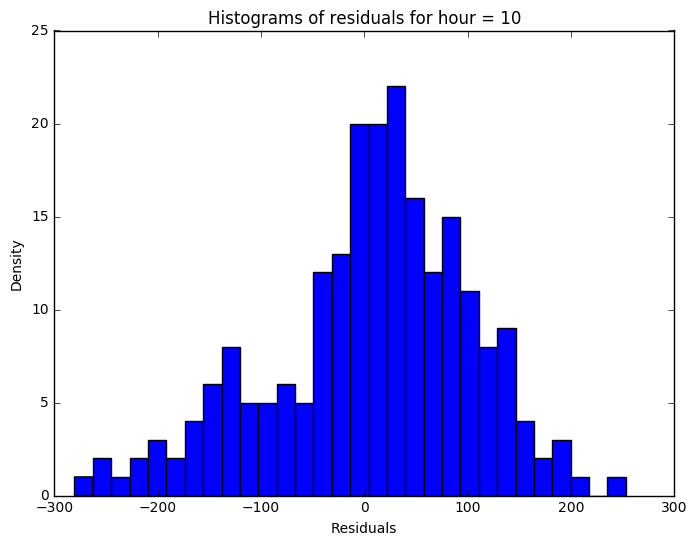

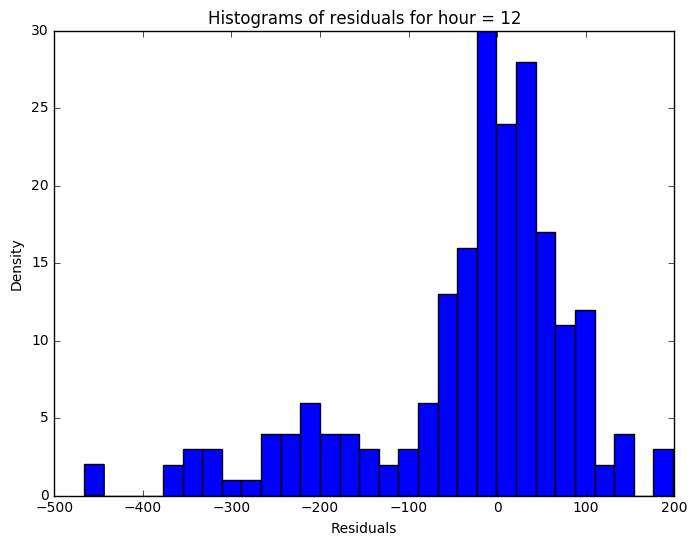

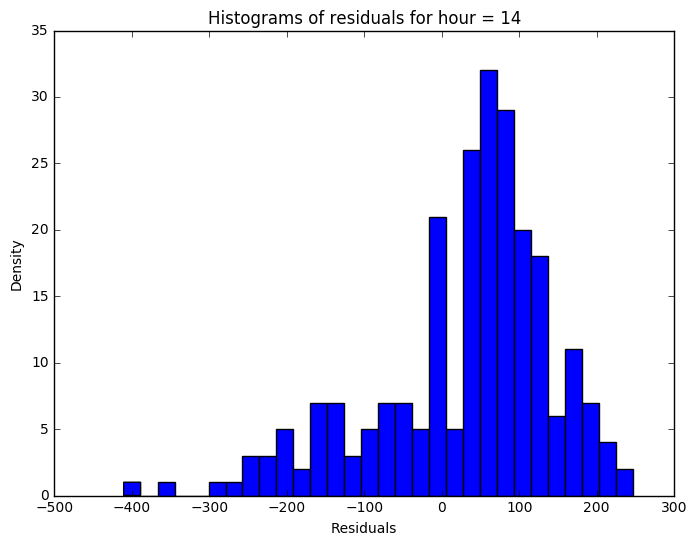

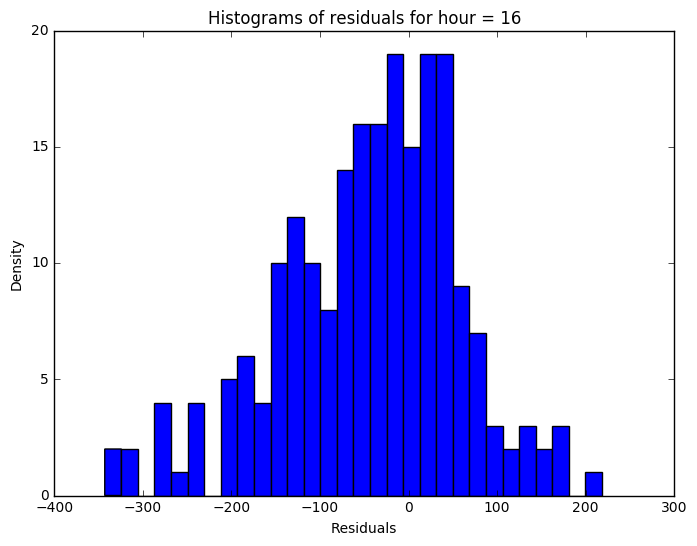

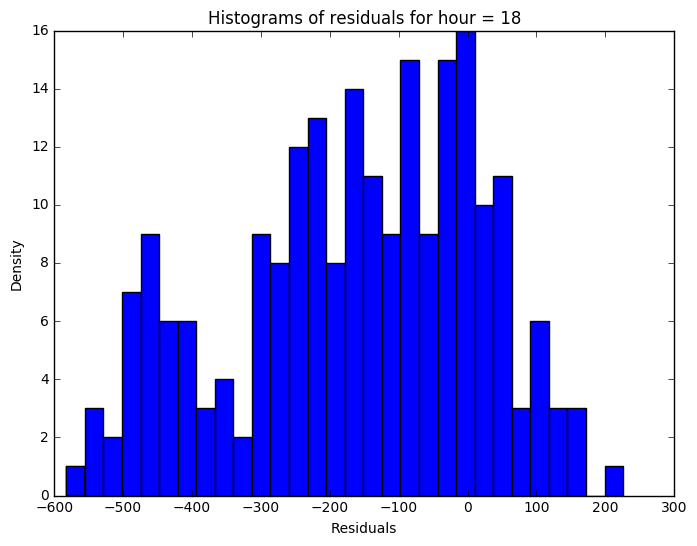

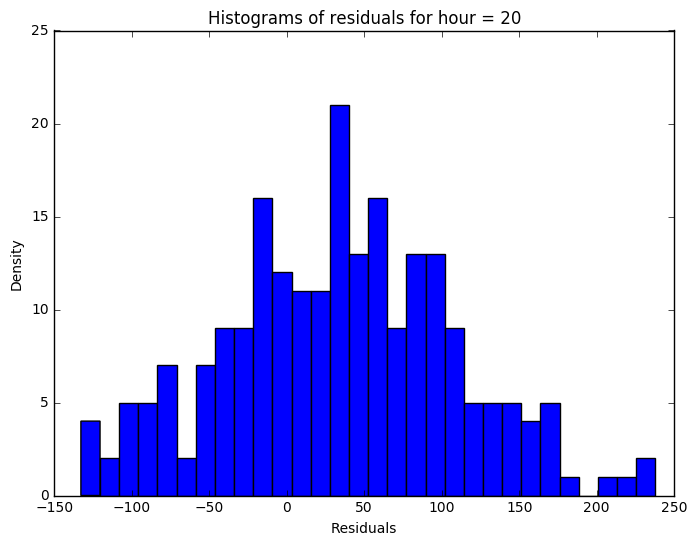

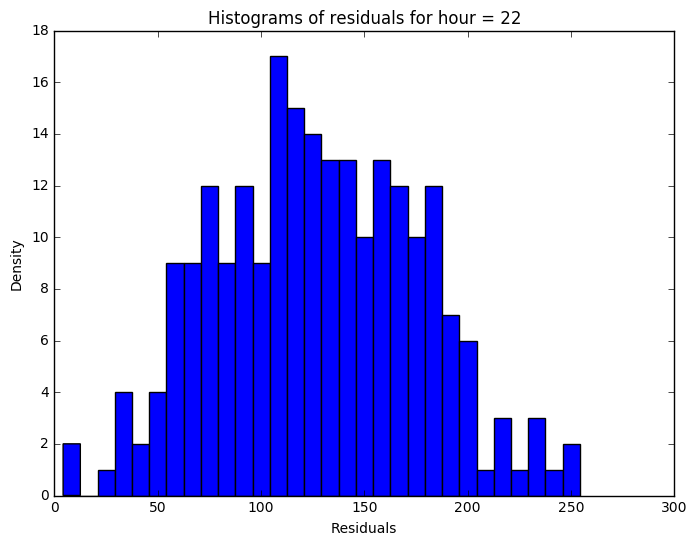

In [12]:
ts_resids_hist(df, times)